In [14]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit
from scipy import stats  
from matplotlib import cm
import math
from scipy.misc import imsave
from scipy.misc import imread
import re
import glob, os
shot = 232
picL = 18333
picR = 18158
v0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL_sum.tif'.format(shot,shot,picL))
v0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR_sum.tif'.format(shot,shot,picR))
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))

Freq = 100.*1000.
DeltaT = 1/Freq
def Parabola(x,a,b,c):
    y = a+b*x+c*x**2
    return y
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')
FitList = []
list = pd.read_csv('./Data/Shot{}/3D/list.csv'.format(shot),header=None)
list.columns = ['TrackL','TrackR']

for it in range(len(list['TrackL'])):
    itL = list['TrackL'].iloc[it]
    itR = list['TrackR'].iloc[it]
    file = "./Data/Shot{}/3D/3DErrEpilineCheckPinghanShot{}Pair{}_{}.csv".format(shot,shot,itL,itR)
#for counter, file in enumerate(glob.glob("./Data/Shot{}/3D/3DErrEpilineCheckPinghanShot{}Pair*.csv".format(shot,shot))):    
    df = pd.read_csv(file)
    f1 = file.split('/')
    f2 = f1[4].split('.csv') 
    f3 = f2[0].split("3DErrEpilineCheckPinghanShot{}Pair".format(shot))
    index = f3[1]
    #print(index)
    Track2D = pd.read_csv('./Data/Shot{}/TrackPair/Pair_{}.csv'.format(shot,index))
    Track2D = Track2D[:-1]
    Track3D = pd.concat([df, Track2D['Frame']], axis=1)
    Track3D['Time']=Track3D['Frame']*DeltaT
    XL=Track3D['Left xx']
    YL=Track3D['Left yy']
    XR=Track3D['Right xx']
    YR=Track3D['Right yy']
    X=Track3D['3Dxx']
    Y=Track3D['3Dyy']
    Z=Track3D['3Dzz']
    T=Track3D['Time']
    
    params_x, pcov_x = curve_fit(Parabola, T, X)
    params_y, pcov_y = curve_fit(Parabola, T, Y)
    params_z, pcov_z = curve_fit(Parabola, T, Z)
    para_list = np.concatenate((params_x,params_y,params_z), axis=0)
    para_list = [it,params_x[0],params_x[1],params_x[2],params_y[0],params_y[1],params_y[2],params_z[0],params_z[1],params_z[2]]
    print(para_list)
    FitList.append(para_list)
    #'''
    fit_X = Parabola(T, params_x[0], params_x[1],params_x[2])
    fit_Y = Parabola(T, params_y[0], params_y[1],params_y[2])
    fit_Z = Parabola(T, params_z[0], params_z[1],params_z[2])
    
    plt.figure(figsize = (24,24))  # make a new figure
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2) 
    #ax1 = fig.gca(projection='3d')
    #ax1.plot(X, Y, Z)
    #ax1.view_init(10, 10)
    #ax1.set_xlabel('X')
    #ax1.set_ylabel('Y')
    #ax1.set_zlabel('Z')    
    ax1.imshow(v0L+v0R+bk0L+bk0R)
    ax1.scatter(XL,YL,color='y',marker=".",s=1)
    ax1.scatter(XR,YR,color='r',marker=".",s=1)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax2.scatter(T,X,color='r',marker=".",s=1)
    ax2.plot(T,fit_X)
    ax2.set_xlabel('T')
    ax2.set_ylabel('X')
    ax3.scatter(T,Y,color='r',marker=".",s=1)
    ax3.plot(T,fit_Y)
    ax3.set_xlabel('T')
    ax3.set_ylabel('Y')
    ax4.scatter(T,Z,color='r',marker=".",s=1)
    ax4.plot(T,fit_Z)
    ax4.set_xlabel('T')
    ax4.set_ylabel('Z')
    plt.savefig("./Data/Shot{}/3D/3DFit_{}.pdf".format(shot,index))
    #'''
    #ax1.view_init(10, 10)
    #ax1.set_xlabel('X')
    #ax1.set_ylabel('Y')
    #ax1.set_zlabel('Z') 
    #ax.plot(X, Y, Z)
#ax.view_init(10, 10)
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#plt.show()

[0, 0.0018099318958635919, -0.1641793645348982, -3.9841941763704347, 0.025651233939210222, -0.32266075820306833, -3.7802637362016887, 0.64604831199182744, -0.25048610156865597, -1.8900042040368903]
[1, 0.18314624333681531, -3.2597972225182144, 6.1951581134172109, -0.08293827920929818, 1.611781942198304, -5.5284798436218976, 0.55376329362585819, 0.97183227281962958, 2.3689482225029761]
[2, -0.16539133260249531, 1.7670668399163028, 12.116860582586064, -0.12265165568444888, 1.7318546334736529, 2.5696887121395826, 0.75762125306279438, -1.2047038116435209, -7.5897378548055414]
[3, -0.18639581968998023, 2.4486313990895092, 6.6848522688315377, -0.15686231178843202, 2.8661692930629936, -6.8207062408286356, 0.74055014452656776, -0.75165783424582167, -10.336817303516003]
[4, -0.075385775367865449, 0.34532613410086394, 4.1887352853228643, -0.10801938675074668, 1.5445420130698644, -0.43766897988621323, 0.63873176521247021, -0.37977807013822984, 0.49777307667948401]
[5, -0.014475122843312951, 0.799

[43, -0.03719497612005699, 0.26508323883305163, 0.531770965209868, 0.1442324323764281, -1.6988063923762469, -7.0227938419517741, 0.81052997251093684, -1.7008139231086306, -14.739326309757931]
[44, -0.10400344091147122, 1.7212968157605846, 2.1157767734109739e-05, 0.12465263057780898, -1.4073492935472907, -4.2394162926417138, 0.64351704547005839, 0.78880036516050001, -11.095330323121212]
[45, -0.016286503252815391, -1.0960446623261537, 19.694254719230212, -0.10024773361306152, 0.44654147339204148, 16.298597156970683, 0.5941873710131893, -0.48259445734363859, 16.511901117635038]
[46, 0.078499424173730639, -1.7072200992223856, 10.377027226207252, -0.20900636551795382, 3.0345492615665508, 1.6768029350736597, 0.61960859886272113, -0.37572102797986295, 10.305269619054911]
[47, -0.11403060651246706, -0.015385465163285587, 30.751410557465256, -0.06376863710141692, 1.0741881914399147, -3.4027101552130188, 0.71280130572835687, -0.070555465788574023, -10.506335636378205]
[48, -0.12268584119184146,

In [15]:
P1 = pd.DataFrame(FitList)
P1.columns = ['Track','Px0','Px1','Px2','Py0','Py1','Py2','Pz0','Pz1','Pz2']
P1['A'] = np.sqrt(P1['Px2']*P1['Px2']/4+P1['Py2']*P1['Py2']/4+P1['Pz2']*P1['Pz2']/4)
P1.to_csv("./Data/Shot{}/3DFitList_{}.csv".format(shot,shot))

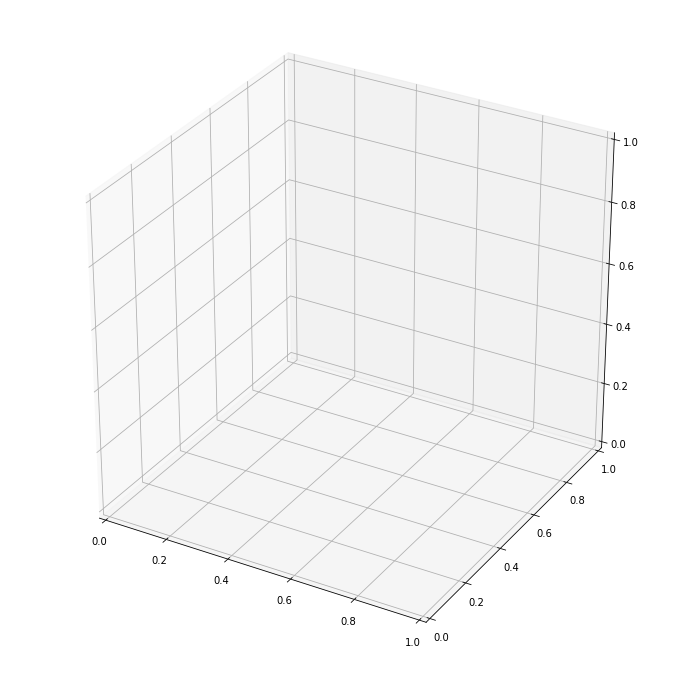

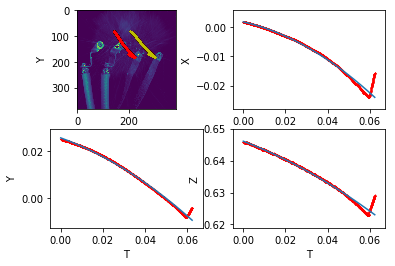

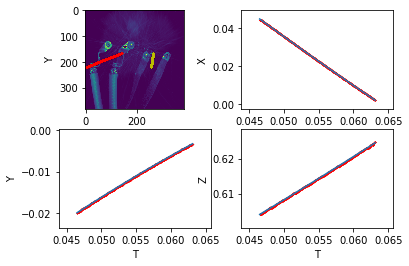

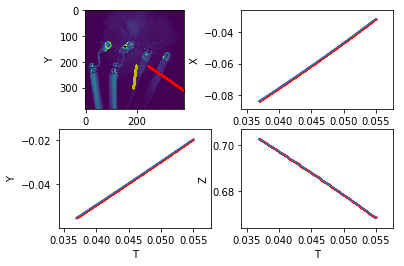

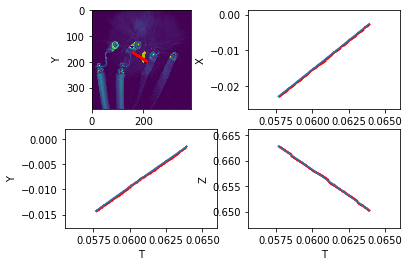

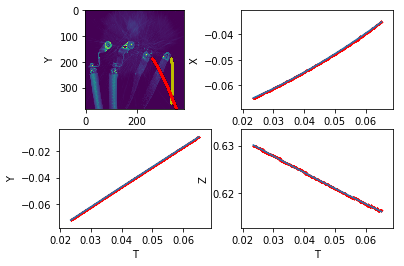

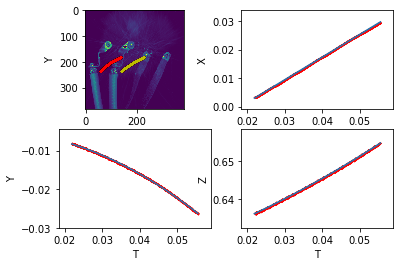

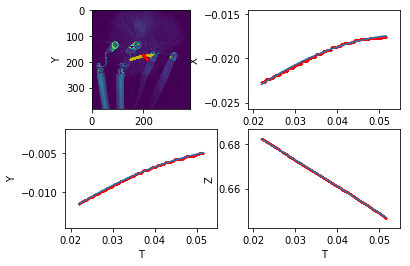

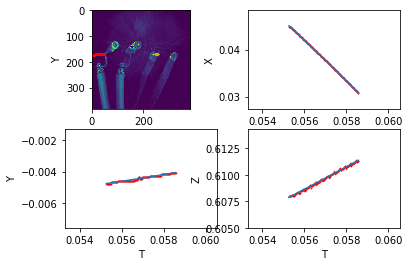

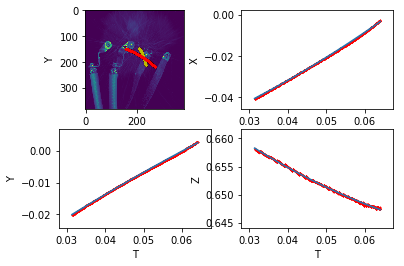

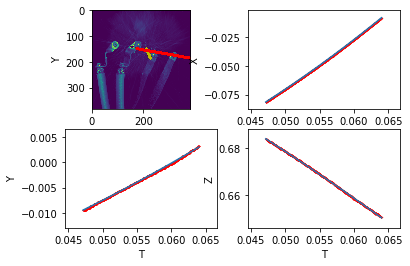

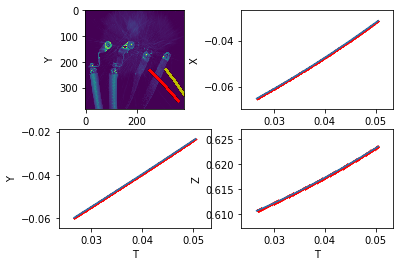

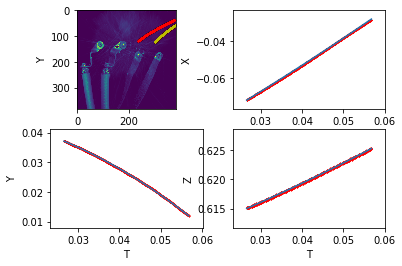

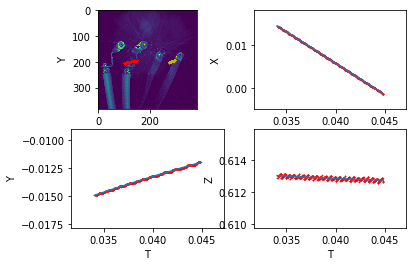

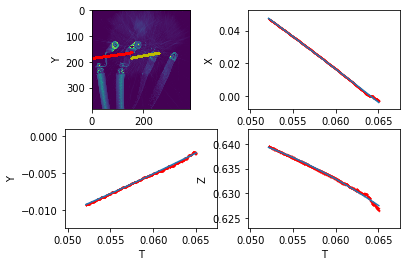

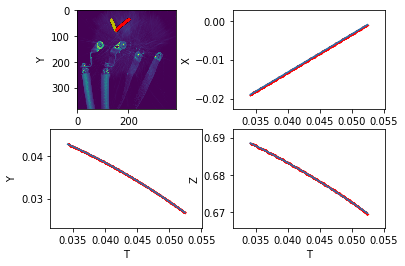

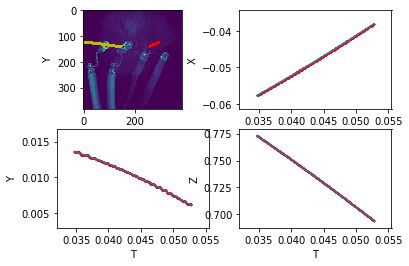

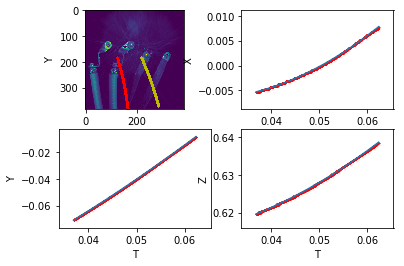

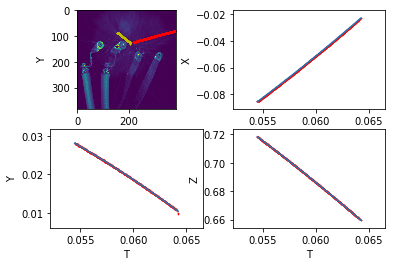

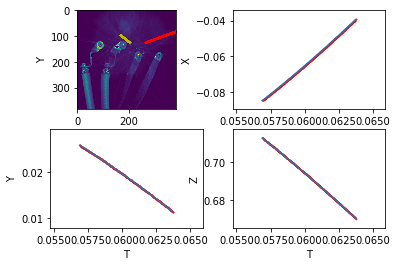

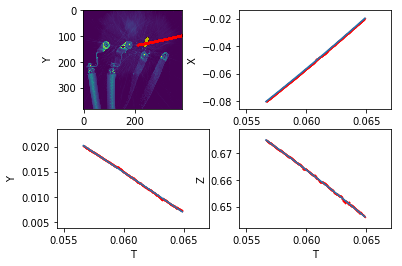

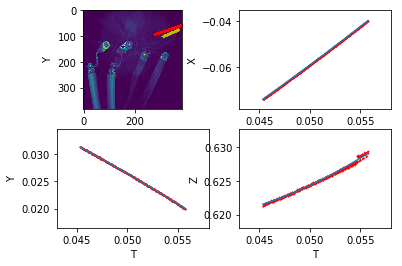

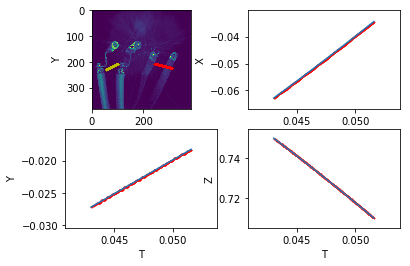

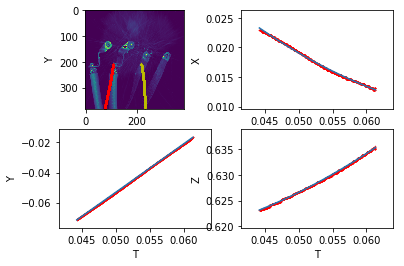

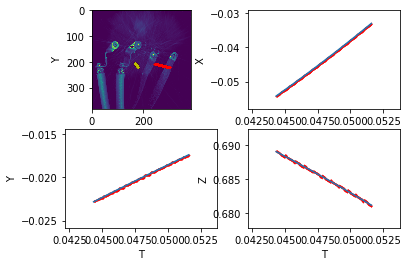

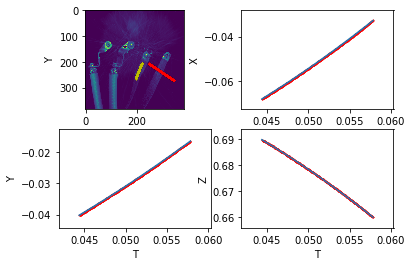

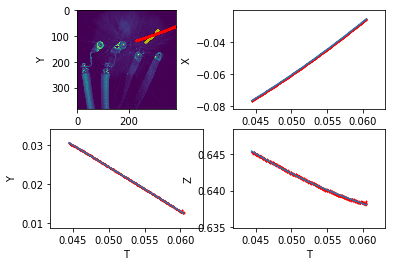

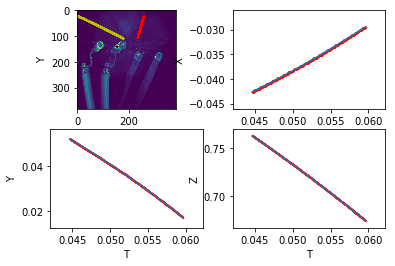

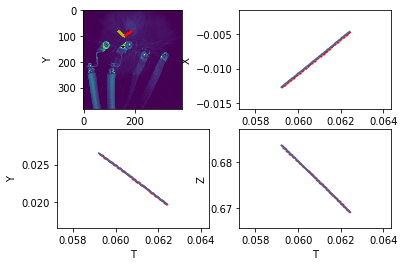

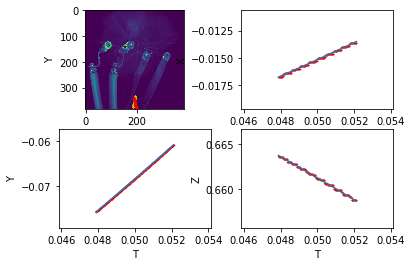

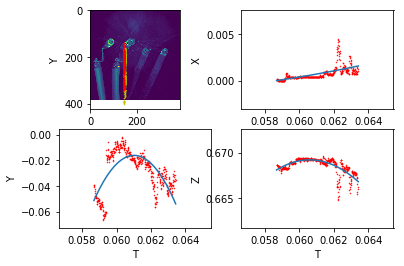

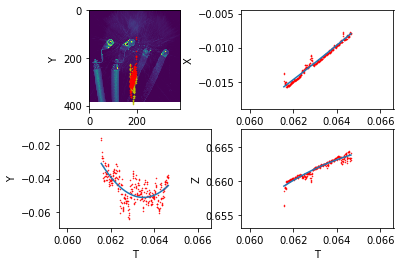

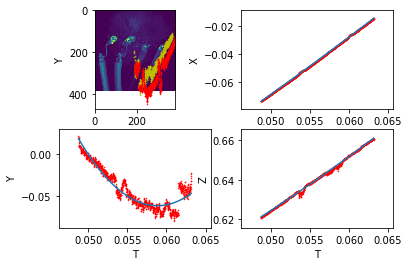

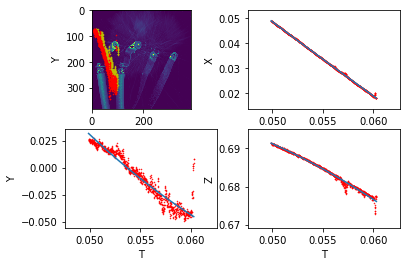

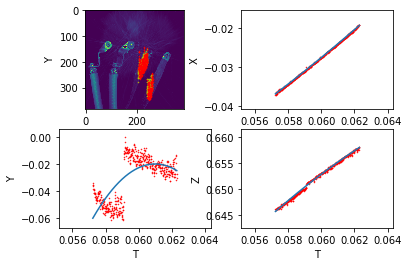

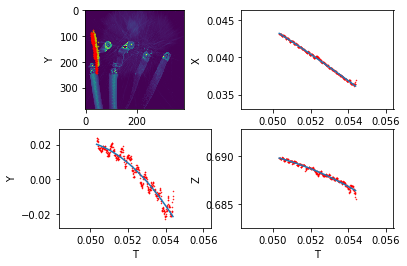

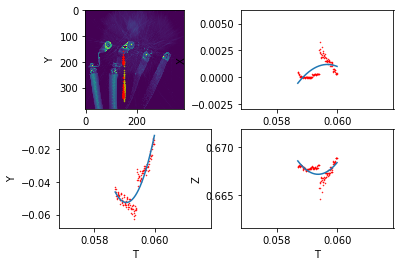

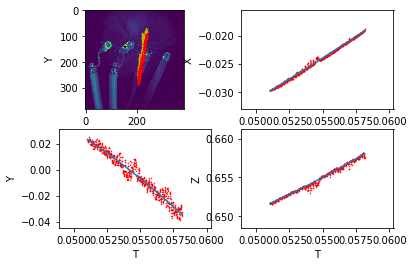

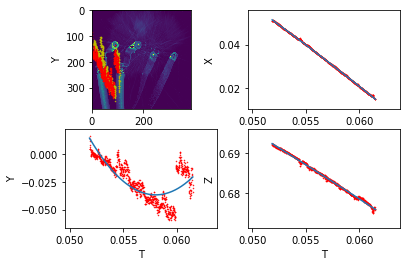

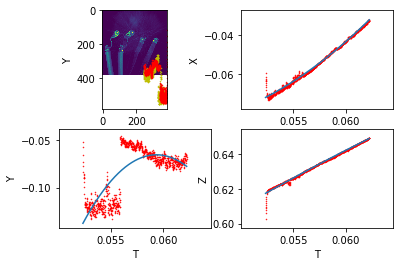

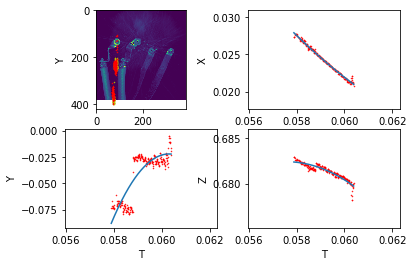

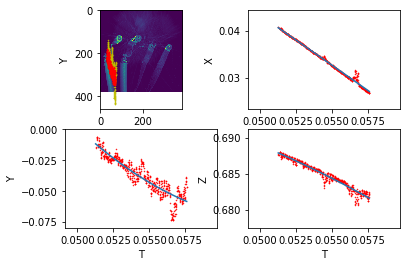

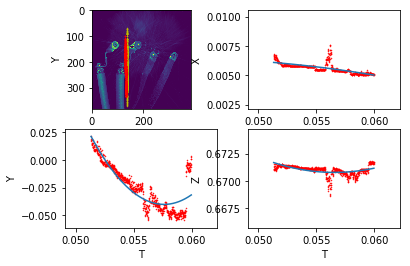

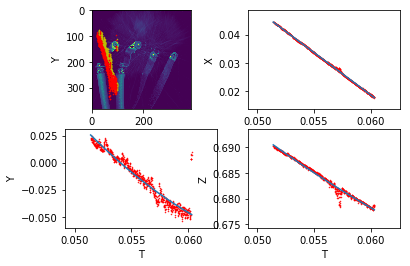

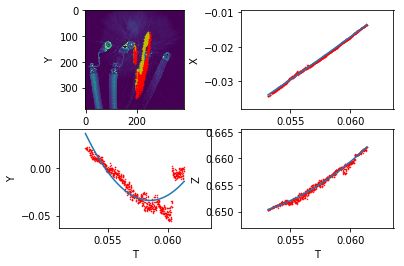

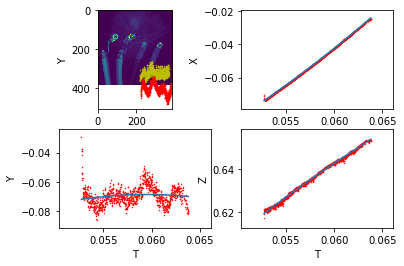

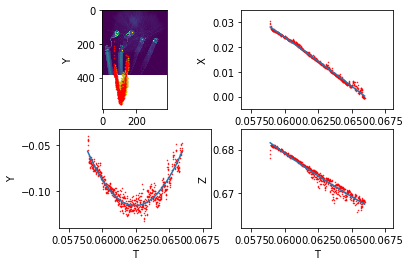

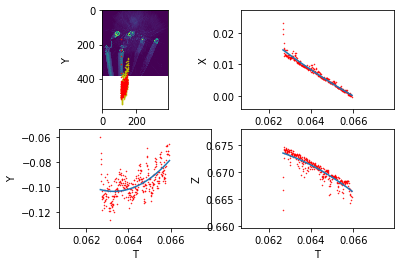

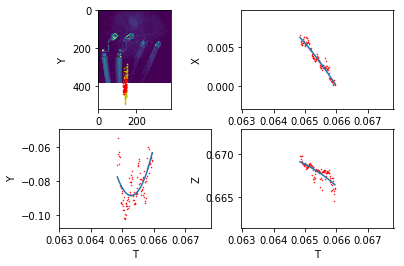

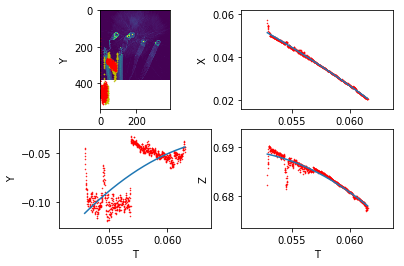

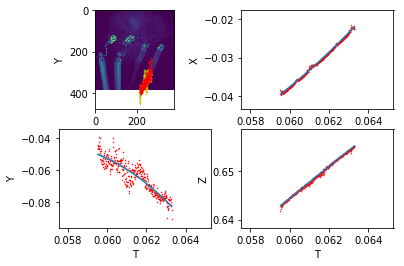

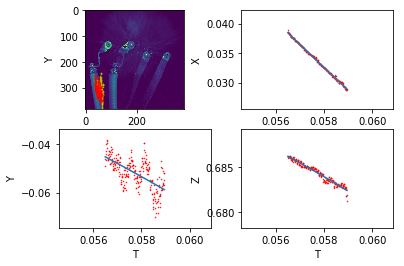

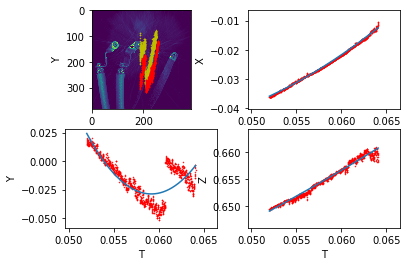

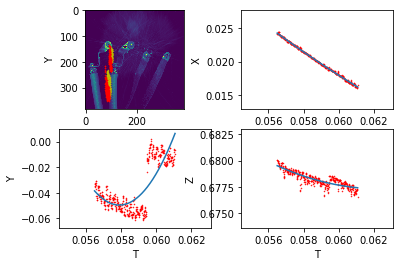

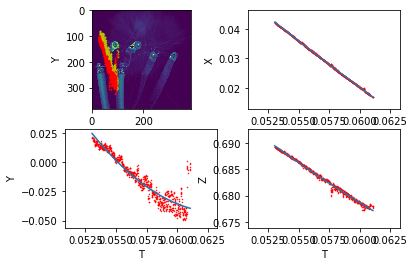

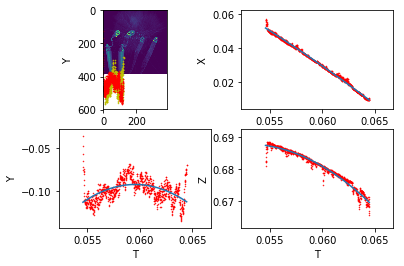

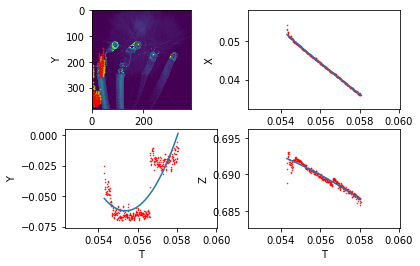

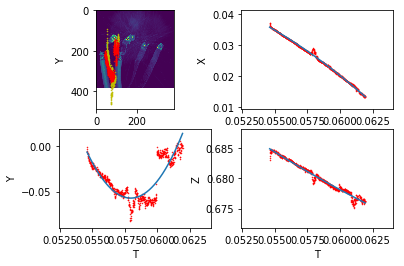

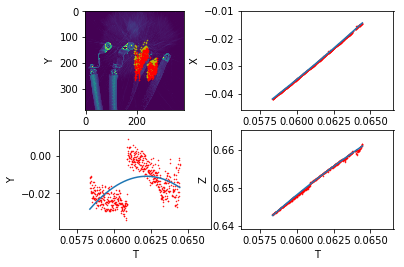

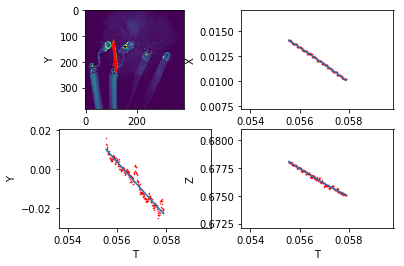

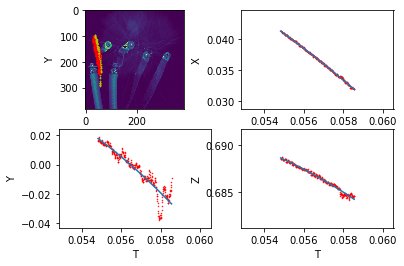

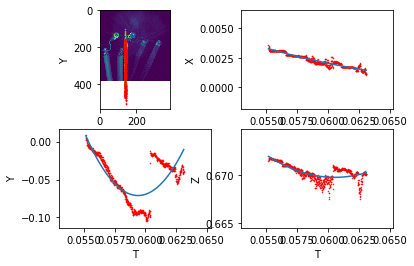

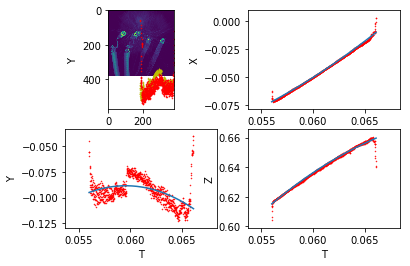

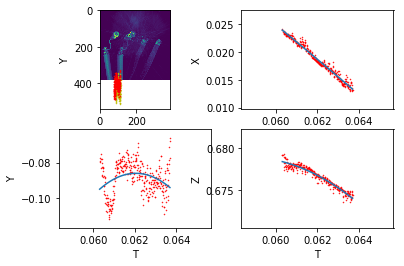

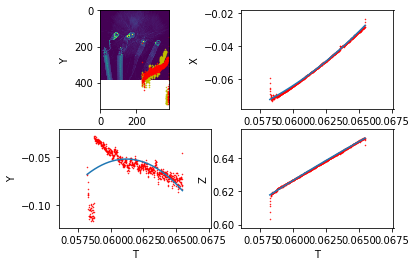

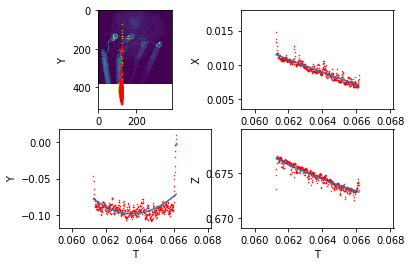

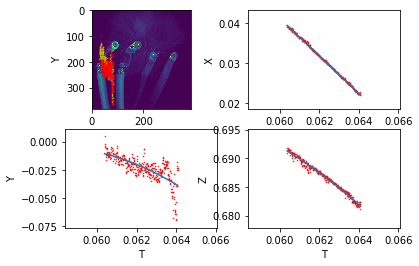

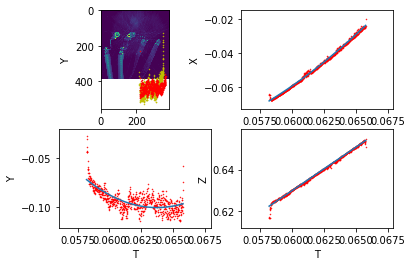

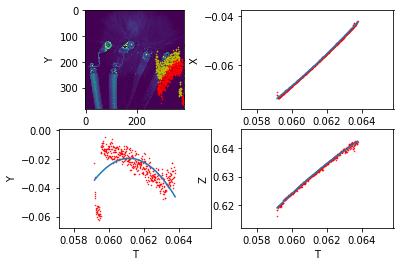

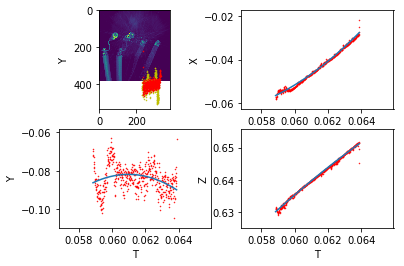

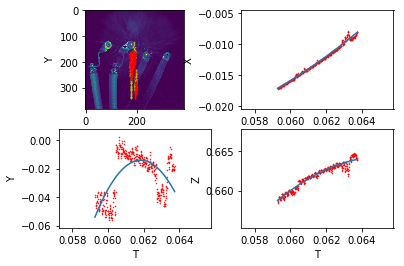

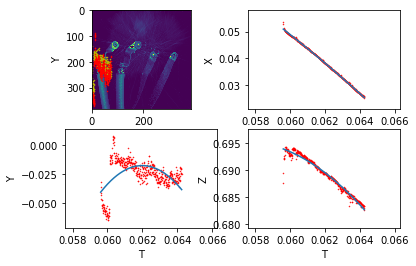

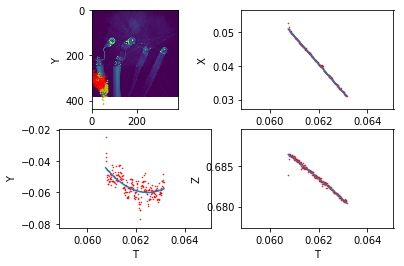

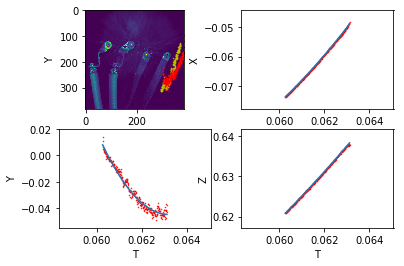

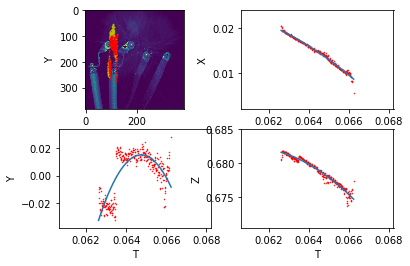

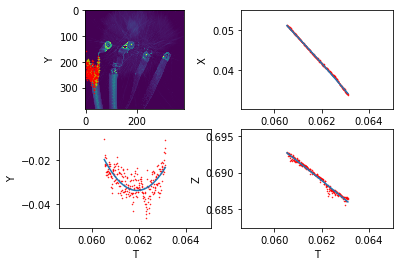

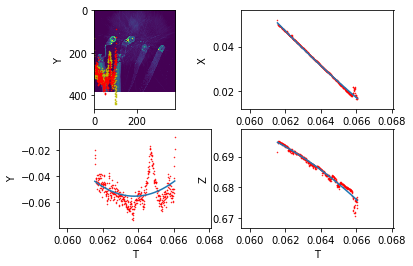

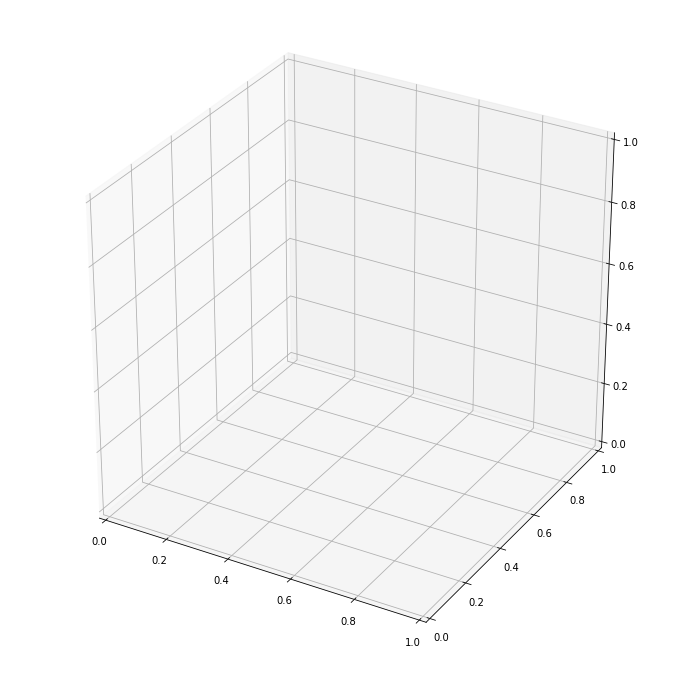

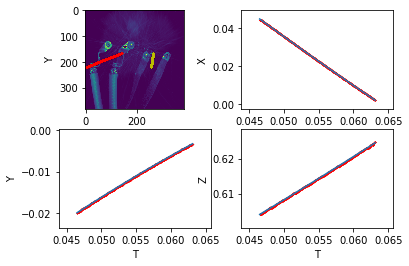

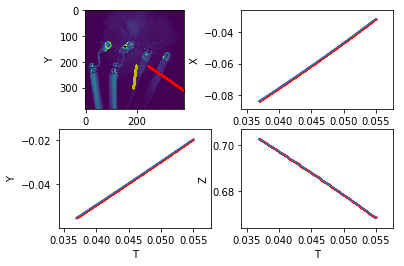

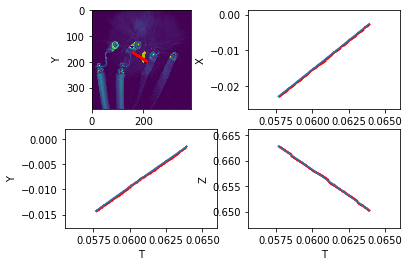

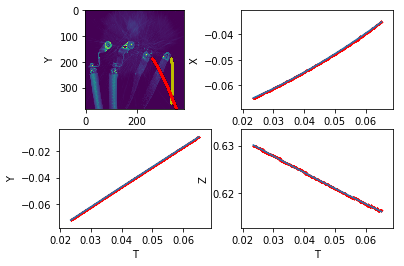

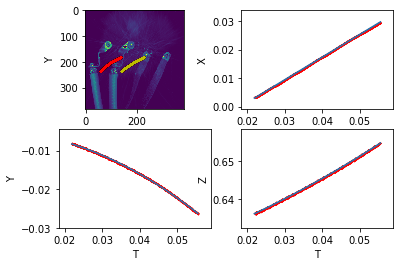

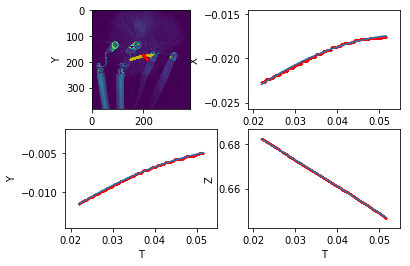

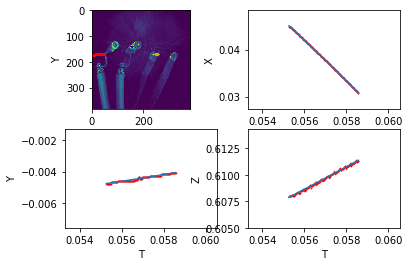

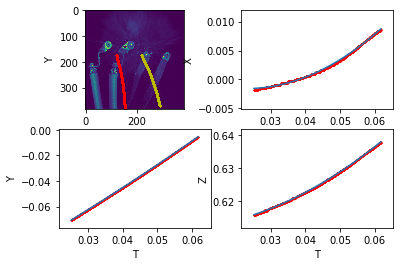

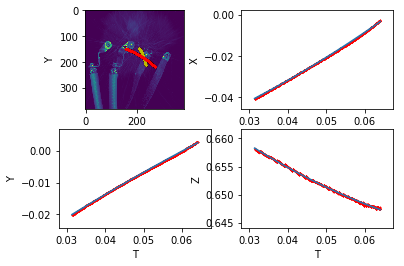

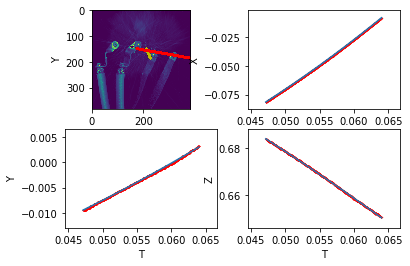

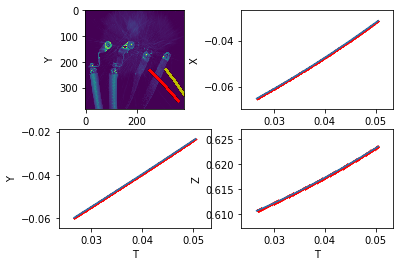

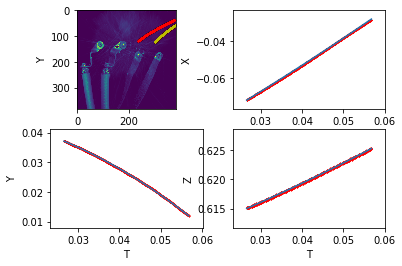

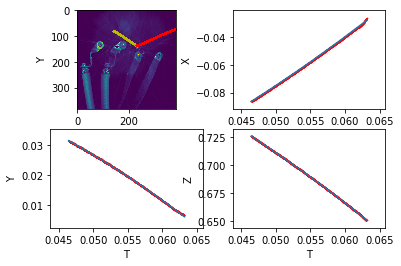

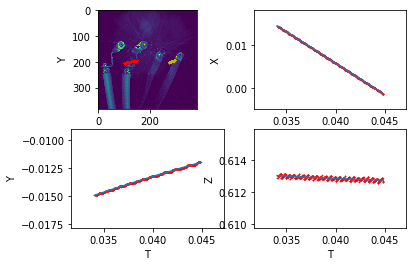

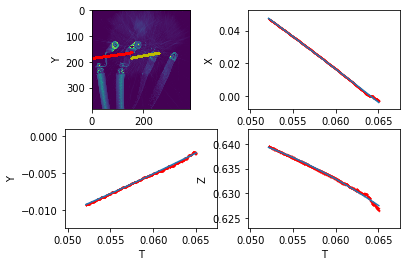

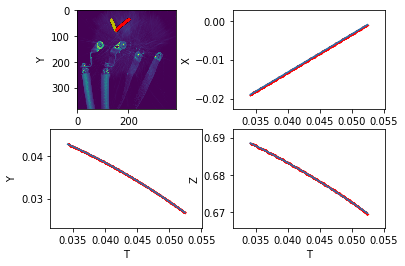

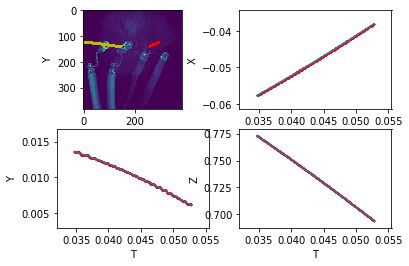

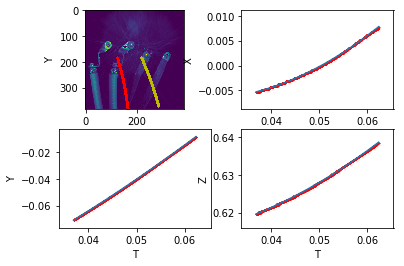

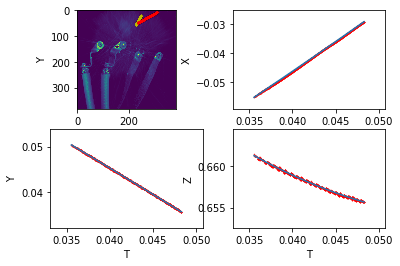

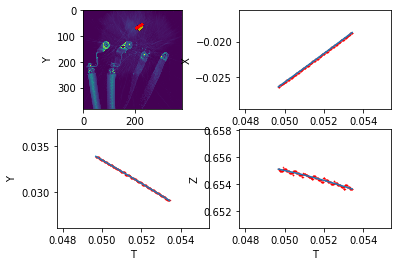

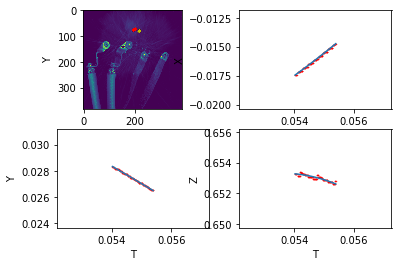

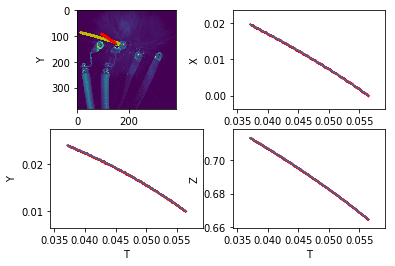

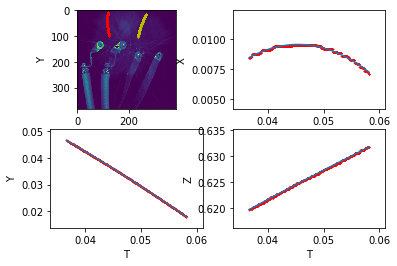

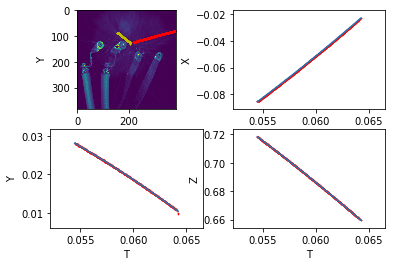

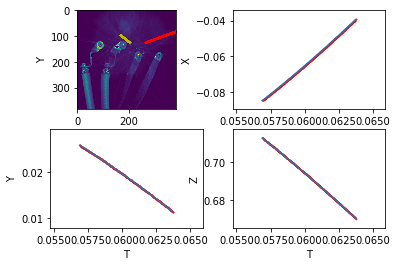

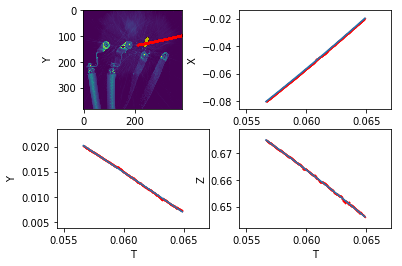

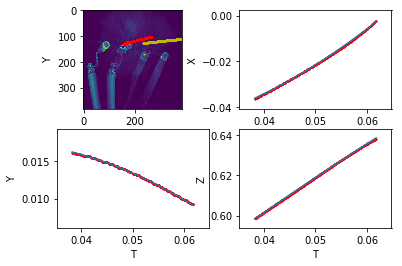

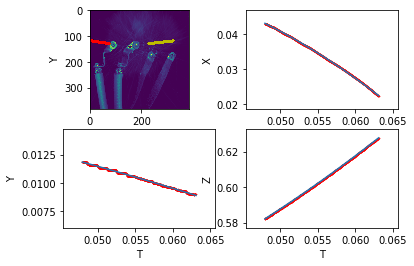

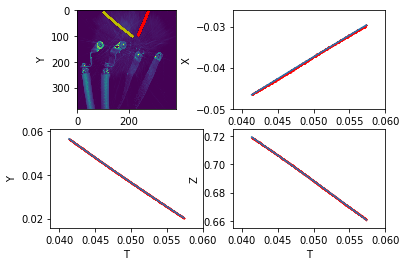

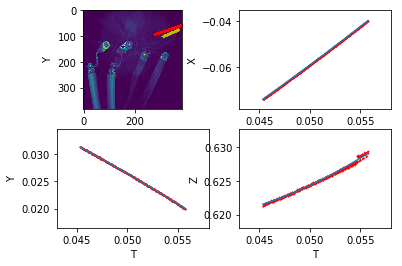

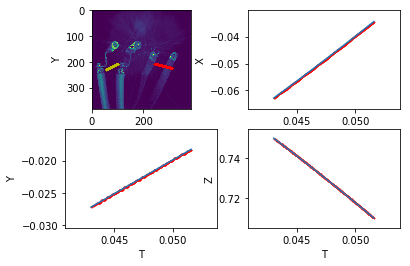

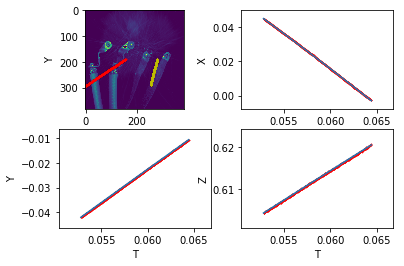

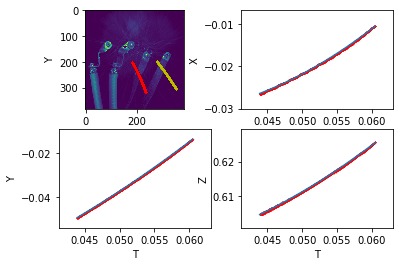

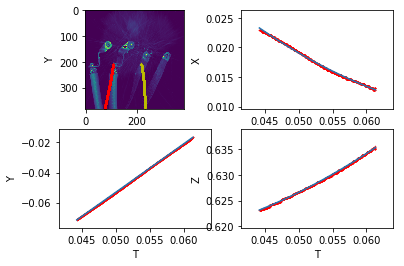

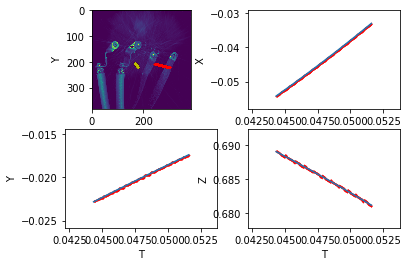

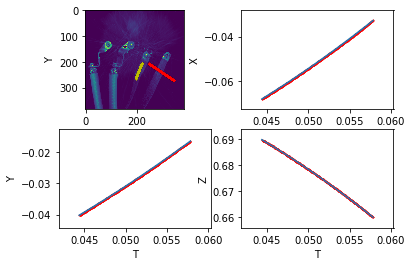

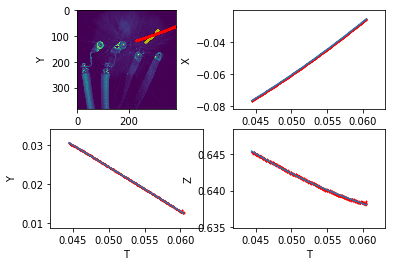

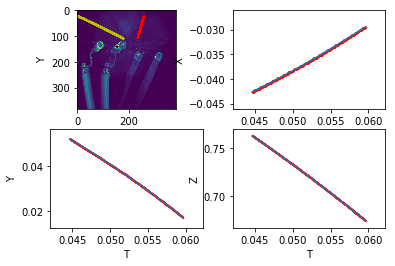

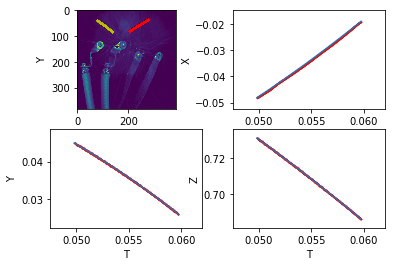

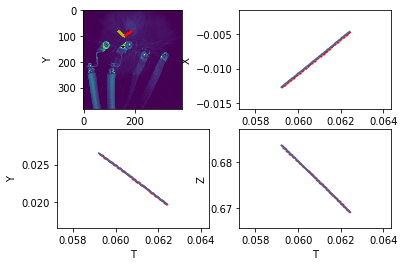

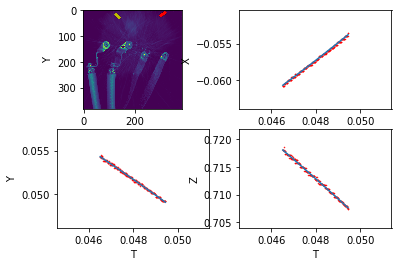

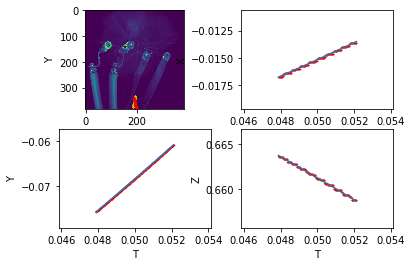

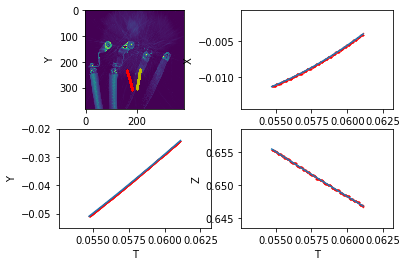

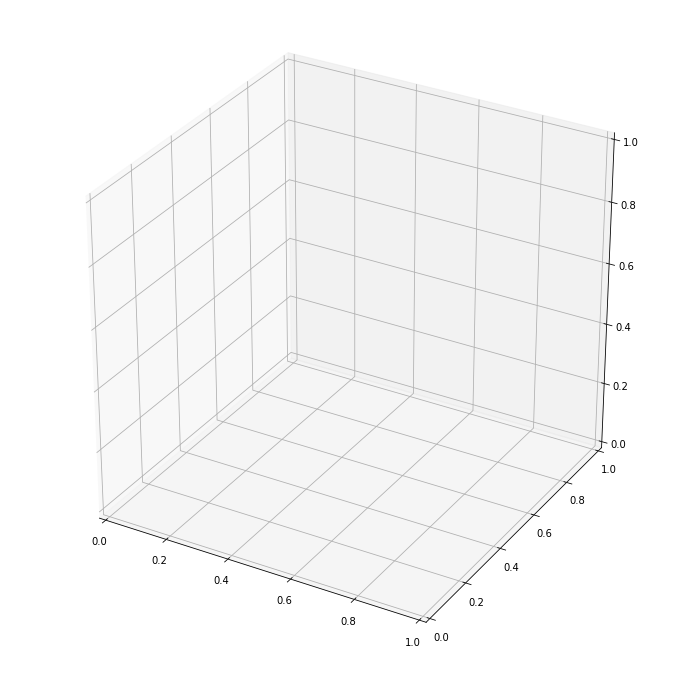

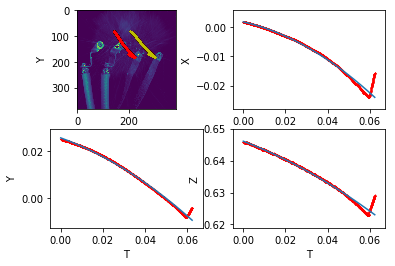

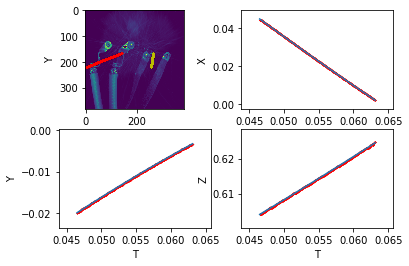

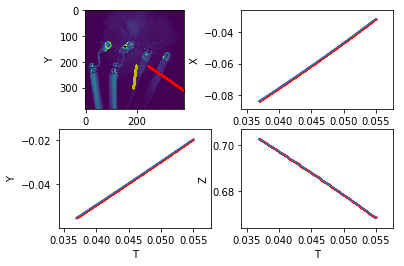

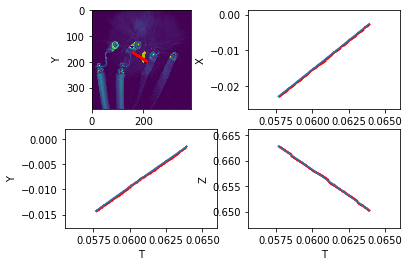

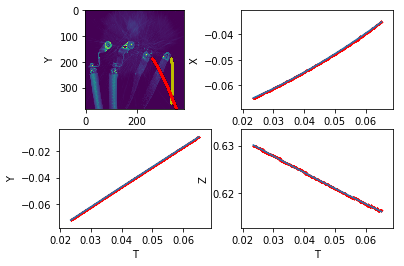

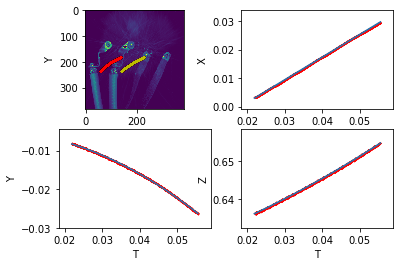

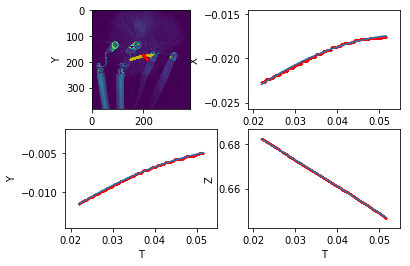

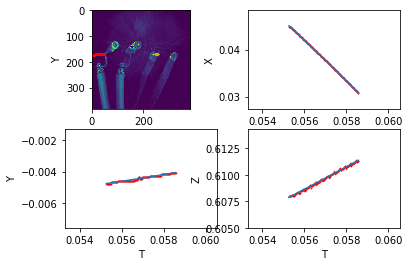

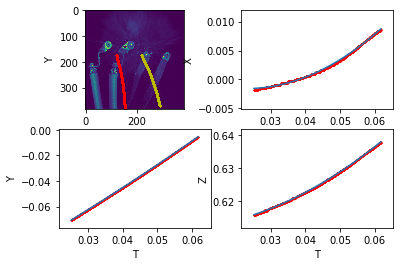

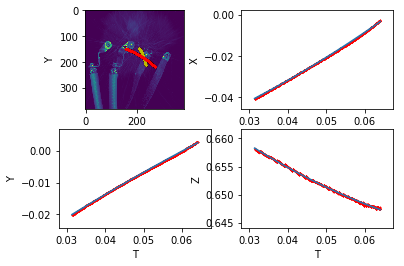

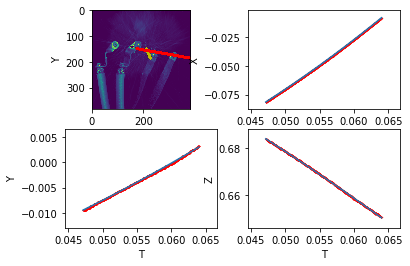

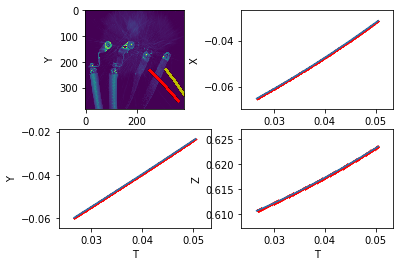

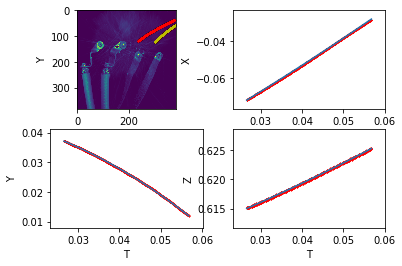

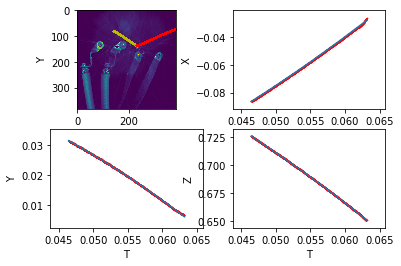

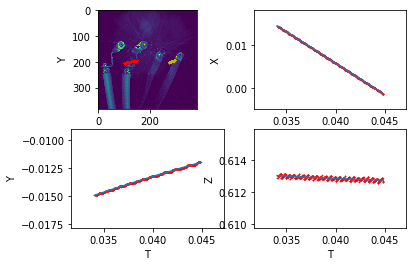

In [ ]:
# Fit a normal distribution to the data of the p2 in the x-axis:
mu, std = stats.norm.fit(P1['Px2'])
plt.hist(P1['Px2'], bins=50, normed=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('px,2')
plt.show()
print(mu,std)
plt.hist(P1['Px0'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('px,0');
plt.show()
plt.hist(P1['Px1'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('px,1');
plt.show()

In [ ]:
# Fit a normal distribution to the data of the p2 in the y-axis:
mu, std = stats.norm.fit(P1['Py2'])
plt.hist(P1['Py2'], bins=50, normed=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('py,2')
plt.show()
print(mu,std)
plt.hist(P1['Py0'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('py,0');
plt.show()
plt.hist(P1['Py1'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('py,1');
plt.show()

In [ ]:
# Fit a normal distribution to the data of the p2 in the z-axis:
mu, std = stats.norm.fit(P1['Pz2'])
plt.hist(P1['Pz2'], bins=50, normed=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('pz,2')
plt.show()
print(mu,std)
plt.hist(P1['Pz0'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('pz,0');
plt.show()
plt.hist(P1['Pz1'],bins=50, normed=True, alpha=0.6, color='b')
plt.xlabel('pz,1');
plt.show()

In [ ]:
mu, std = stats.norm.fit(P1['A'])
plt.hist(P1['A'], bins=50, normed=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('A')
plt.show()
print(mu,std)